# 1. Setup

## 1.1. Python imports

In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2. NLTK downloads

Only run if needed, on new environment, or if the files have been deleted.

In [2]:
#nltk.download('punkt')
#nltk.download('stopwords')

# 2. Data setup

## 2.1. Get data from csv

In [2]:
publico_path = '../extra/notícias/news_sample_1to1000_updated.csv'

In [138]:
df_publico = pd.read_csv(publico_path, index_col='Unnamed: 0') #index_col = "Unnamed: 0"

In [4]:
df_publico_shape = df_publico.shape

In [5]:
df_publico_shape
#22/07/2020 -> (8849, 5)
#28/07/2020 -> (9670, 42)

(9670, 42)

In [6]:
df_publico.columns 

#22/07/2020 -> ['Data', 'Titulo', 'Descricao', 'Rubrica', 'URL']
#28/07/2020 -> ['titulo', 'descricao', 'titulo_Mobile', 'subtitulo', 'rubricTag',
#               'rubrica', 'tipo', 'palavraChave', 'tipoLayout', 'isOpinion',
#               'prioridade', 'isPreview', 'aoMinuto', 'isFeature', 'dataActualizacao',
#               'data', 'autores_id', 'autores_nome', 'autores_localizacao',
#               'autores_profissaoActual', 'autores_profissaoNaAltura',
#               'autores_isExternal', 'autores_contribuicao', 'autores_tipo', 'tags_id',
#               'tags_nome', 'tags_isPrincipal', 'tags_isTimeLine',
#               'tags_forcaConteudoAberto', 'tags_isForForuns', 'tags_isUsedInForuns',
#               'isSponsorContent', 'isClubeP', 'isItemOpinion', 'isMultipleRubric',
#               'socialTitle', 'isLongForm', 'isHeadline', 'wordCount', 'extra4',
#               'partners', 'props']

Index(['titulo', 'descricao', 'titulo_Mobile', 'subtitulo', 'rubricTag',
       'rubrica', 'tipo', 'palavraChave', 'tipoLayout', 'isOpinion',
       'prioridade', 'isPreview', 'aoMinuto', 'isFeature', 'dataActualizacao',
       'data', 'autores_id', 'autores_nome', 'autores_localizacao',
       'autores_profissaoActual', 'autores_profissaoNaAltura',
       'autores_isExternal', 'autores_contribuicao', 'autores_tipo', 'tags_id',
       'tags_nome', 'tags_isPrincipal', 'tags_isTimeLine',
       'tags_forcaConteudoAberto', 'tags_isForForuns', 'tags_isUsedInForuns',
       'isSponsorContent', 'isClubeP', 'isItemOpinion', 'isMultipleRubric',
       'socialTitle', 'isLongForm', 'isHeadline', 'wordCount', 'extra4',
       'partners', 'props'],
      dtype='object')

## 2.2. Clean data

In [133]:
num_nulls = df_publico.isnull().sum()

In [139]:
empty_cols = list()
for col in df_publico:
    if num_nulls[col] == df_publico_shape[0]:
        df_publico.drop(columns=[col], inplace=True)
        empty_cols.append(col)

In [123]:
print(empty_cols)

['titulo_Mobile', 'palavraChave', 'partners', 'props']


In [120]:
len(df_publico.columns)

38

In [113]:
i = 37
print(df_publico.columns[i])
df_publico[df_publico.columns[i]].value_counts()

extra4


NOTIFIED    1631
Name: extra4, dtype: int64

In [69]:
df_publico[df_publico.columns[4]]

0          Covid-19
1       Coronavírus
2       Coronavírus
3       Coronavírus
4          Covid-19
           ...     
9665          Vírus
9666          Vírus
9667          China
9668          Vírus
9669          Vírus
Name: rubrica, Length: 9670, dtype: object

After manually checking the number of values in each column, as well as the values themselves, the following columns were considered useless:

In [122]:
useless_cols_index = [3, 9, 11, 29, 35]
useless_cols = [df_publico.columns[col] for col in useless_cols_index]
print(useless_cols)

['rubricTag', 'isPreview', 'isFeature', 'isSponsorContent', 'isHeadline']


In [140]:
df_publico.drop(columns=useless_cols, inplace=True)

In [126]:
len(df_publico.columns)

33

In [128]:
df_publico.head()

,titulo,descricao,subtitulo,rubrica,tipo,tipoLayout,isOpinion,prioridade,aoMinuto,dataActualizacao,...,tags_forcaConteudoAberto,tags_isForForuns,tags_isUsedInForuns,isClubeP,isItemOpinion,isMultipleRubric,socialTitle,isLongForm,wordCount,extra4
0,Linha de mil milhões para micro e pequenas emp...,Ministério da Economia diz que a formalização ...,NaN,Covid-19,NOTICIA,MULTIMEDIA_NORMAL,False,3.0,False,NaN,...,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",False,False,False,Covid-19. Linha de mil milhões para micro e pe...,False,349,NaN
1,Covid-19: Twitter retira vídeo e mensagens de ...,"Segundo o jornal <i>The Washington Post</i>, o...",NaN,Coronavírus,NOTICIA,MULTIMEDIA_NORMAL,False,3.0,False,NaN,...,"[False, False, False, False, False, False, False]","[False, False, False, False, False, False, False]","[False, False, False, False, False, False, False]",False,False,False,Coronavírus. Covid-19: Twitter retira vídeo e ...,False,358,NaN
2,Tecnologia portuguesa elimina o novo coronavír...,"A tecnologia pioneira AT MicroProtect, desenvo...",NaN,Coronavírus,NOTICIA,MULTIMEDIA_NORMAL,False,3.0,False,NaN,...,"[False, False, False, False, False]","[False, False, False, False, False]","[False, False, False, False, False]",False,False,False,Coronavírus. Tecnologia portuguesa elimina o n...,False,740,NaN
3,"“Não somos super-homens, somos humanos”: os re...",Há de tudo: a algumas pessoas a covid-19 não p...,NaN,Coronavírus,NOTICIA,LONGFORM_NORMAL,False,3.0,False,NaN,...,"[False, False, False, False, False, False, False]","[False, False, False, False, False, False, False]","[False, False, False, False, False, False, False]",False,False,False,"Coronavírus. “Não somos super-homens, somos hu...",True,2108,NOTIFIED
4,Dez milhões de euros para as instituições part...,"Da aquisição de máscaras, luvas e viseiras à c...",NaN,Covid-19,NOTICIA,MULTIMEDIA_NORMAL,False,3.0,False,NaN,...,"[False, False, False, False, False, False]","[False, False, False, False, False, False]","[False, False, False, False, False, False]",False,False,False,Covid-19. Dez milhões de euros para as institu...,False,330,NaN


## 2.3. Separate data column

In [143]:
#split data column into day and hour columns
temp_cols = df_publico['data'].str.split('T', expand = True)

df_publico['day'] = temp_cols[0]
df_publico['hms'] = temp_cols[1]
#df_publico.drop(columns='Data', inplace=True)

#split day column into year, month and day columns
temp_cols = df_publico['day'].str.split('-', expand = True)

df_publico['year'] = temp_cols[0]
df_publico['month'] = temp_cols[1]
df_publico['day'] = temp_cols[2]

#order columns
#df_publico = df_publico[['Data','Ano', 'Mes', 'Dia', 'Hora', 'Titulo', 'Descricao', 'Rubrica', 'URL']]

In [144]:
df_publico[['data', 'year', 'month', 'day', 'hms']]

,data,year,month,day,hms
0,2020-07-28T17:16:49,2020,07,28,17:16:49
1,2020-07-28T17:05:16,2020,07,28,17:05:16
2,2020-07-28T16:32:15,2020,07,28,16:32:15
3,2020-07-28T16:10:41,2020,07,28,16:10:41
4,2020-07-28T15:18:03,2020,07,28,15:18:03
...,...,...,...,...,...
9665,2020-01-22T17:22:42,2020,01,22,17:22:42
9666,2020-01-22T17:15:01,2020,01,22,17:15:01
9667,2020-01-22T08:22:39,2020,01,22,08:22:39
9668,2020-01-21T19:05:03,2020,01,21,19:05:03


# 3. Data preprocessing

## 3.1. Tokenize news titles

In [145]:
df_publico['title_tokenized'] = df_publico.apply(lambda row: nltk.word_tokenize(row['titulo']), axis=1)

## 3.2. Create column with word length

In [146]:
df_publico['title_length'] = df_publico['title_tokenized'].apply(len)

In [147]:
s_publico_describe = df_publico['title_length'].describe()

In [148]:
s_publico_describe

count    9670.000000
mean       12.131231
std         4.304263
min         1.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        42.000000
Name: title_length, dtype: float64

- 22/07/2020
    - Uma média de 12 palavras, com um desvio padrão de 4.3, dando um intervalo de comprimento entre 8 e 16 palavras.
    - A média corresponde mais ou menos à mediana.
    - Um mínimo de comprimento de 1 palavra apenas.
    - Um máximo, por outro lado, de 42 palavras
- 29/07/2020
    - Igual a 22/07/2020

# 4. Data analysis

## 4.1. Find news with min and max word length

In [151]:
min_index = (df_publico[df_publico['title_length'] == s_publico_describe.loc['min']]).index
max_index = (df_publico[df_publico['title_length'] == s_publico_describe.loc['max']]).index

In [167]:
print('Notícias com número de palavras igual a {} (min)'.format(s_publico_describe.loc['min']))
print('')
for idx in min_index:
    print(idx, df_publico['titulo'].iloc[idx])

Notícias com número de palavras igual a 1.0 (min)

249 Metamorfose
932 Desconfinacalma
1427 Desconfinamedo
4171 Sudoku
4272 Falhei
4286 Regressar
4931 Mães-mãe
5074 Purificação
5290 PanDemocracia

7431 Ilhas
7492 Fuga
7990 Medo


In [168]:
print('Notícias com número de palavras igual a {} (max)'.format(s_publico_describe.loc['max']))
print('')
for idx in max_index:
    print(idx, df_publico['titulo'].iloc[idx])

Notícias com número de palavras igual a 42.0 (max)

7499 Da tv para o mundo real: <i>Anatomia de Grey</i>, <i>The Good Doctor</i> ou <i>Station 19</i> doam materiais para travar o novo coronavírus


## 4.2. Title length distribution

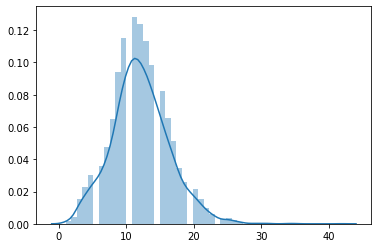

In [157]:
sns.distplot(df_publico['title_length'].values)

## 4.3. Amount of news

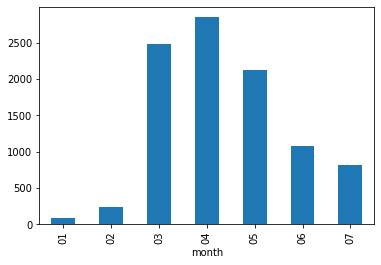

In [181]:
df_publico.groupby(['month']).count()['titulo'].plot(kind='bar')

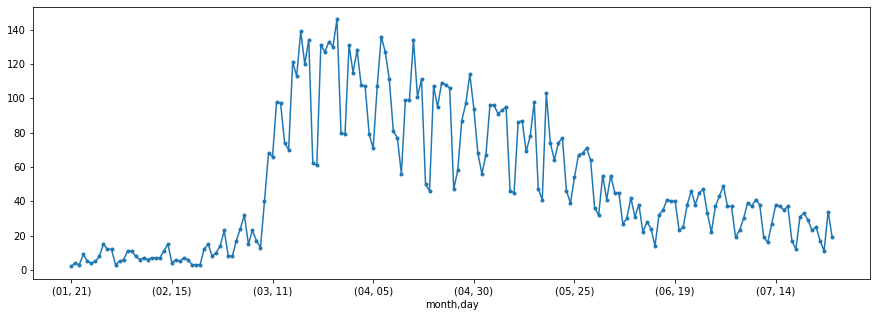

In [216]:
ax = df_publico.groupby(['month', 'day']).count()['titulo'].plot(figsize=(15,5), marker='.')

## 4.4. Medidas governamentais

In [191]:
medidas_path = '../extra/medidas_governamentais/medidas_governamentais.csv'

In [196]:
df_medidas = pd.read_csv(medidas_path, header=None)

In [198]:
df_medidas.columns = ['data', 'region', 'type', 'description']

In [200]:
df_medidas['type'].value_counts()

Medidas            57
Desconfinamento    47
Calamidade         10
Emergência          3
Alerta              2
Contigência         1
Name: type, dtype: int64

In [206]:
df_medidas_estados = df_medidas[(df_medidas['type']=='Calamidade') |
                                (df_medidas['type']=='Emergência') |
                                (df_medidas['type']=='Alerta') |
                                (df_medidas['type']=='Contigência')]

In [209]:
df_medidas_estados[df_medidas_estados['region']=='Portugal']

,data,region,type,description
5,13-03-2019,Portugal,Alerta,Decretado o Estado de Alerta
21,18-03-2020,Portugal,Emergência,Decretado o estado de emergência em Portugal
37,03-04-2020,Portugal,Emergência,Prorrogação do Estado de Emergência
47,17-04-2020,Portugal,Emergência,Prorrogação do Estado de Emergência
50,03-05-2020,Portugal,Calamidade,Decretado Estado de Calamidade
73,15-05-2020,Portugal,Calamidade,Prorrogação do estado de Calamidade
96,09-06-2020,Portugal,Calamidade,Prorrogação da Situação de Calamidade até 28-0...
107,01-07-2020,Portugal,Alerta,Decretada situação de Alerta em todo o país ex...


In [228]:
df_publico['titulo']

0       Linha de mil milhões para micro e pequenas emp...
1       Covid-19: Twitter retira vídeo e mensagens de ...
2       Tecnologia portuguesa elimina o novo coronavír...
3       “Não somos super-homens, somos humanos”: os re...
4       Dez milhões de euros para as instituições part...
                              ...                        
9665    É a pior altura do ano para lidar com um vírus...
9666    Novo coronavírus: 20 perguntas sobre o que se ...
9667    Número de mortes causadas pelo novo coronavíru...
9668    Novo vírus da pneumonia que está a afectar a C...
9669    Novo tipo de pneumonia na China mata pelo meno...
Name: titulo, Length: 9670, dtype: object

In [229]:
df_publico[['month', 'day', 'titulo']].groupby('month', 'day').count()

ValueError: No axis named day for object type <class 'pandas.core.frame.DataFrame'>

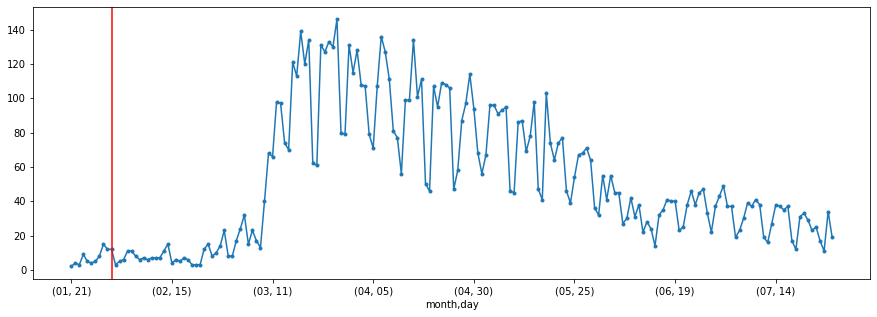

In [217]:
ax = df_publico.groupby(['month', 'day']).count()['titulo'].plot(figsize=(15,5), marker='.')
ax.axvline(x=, color='red')

## 4.4. Stopwords

Probably should remove stopwords...

In [158]:
stopwords = nltk.corpus.stopwords.words('portuguese')

Should have a better way to remove punctuation, but...
¯\\_(ツ)_/¯

In [159]:
punctuation = ["\\", "|", "!", "\"", "#", "$", "%",
               "&", "/", "(", ")", "=", "?", ",", ";",
               ".", ":", "“", "<", ">"]

In [169]:
for item in punctuation:
    stopwords.append(item)

In [170]:
full_corpus = [item for sublist in df_publico['title_tokenized'].values.tolist() for item in sublist]

In [171]:
filtered_corpus = [w for w in full_corpus if not w in stopwords]

In [172]:
for item in filtered_corpus:
    if len(item) < 2:
        filtered_corpus = [word for word in filtered_corpus if word != item]